# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!

> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.
>
> Gerne bitte ich auch eine Sprechstunde neben den Vorlesungen wo wir uns einmal wöchentlich treffen und Ihr mir direkt Fragen stellt könnte.





Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

# Google Colab:
---
##### 1. [Python Programmierung mit Google Colab link](https://colab.research.google.com/drive/1_LOqSLE3ogQIeh5_ho03JoLbuJAGTnwF)

<img src="Pictures_for_Explanation/1_Google_Colab_Starten.png" alt="Bildbeschreibung" width="700"/>



##### 2. Um ein Skript zu öffnen Navigiert auf Datei was oben Rechts vorzufinden ist und klickt "Notebook öffnen"

<img src="Pictures_for_Explanation/2_Datei_Optionen_öffnen.png" alt="Bildbeschreibung" width="700"/>

##### 3. Danach geht ihr  auf **Github** und fügt folgenden Link hinzu https://github.com/RiccardoDAndrea/Python-Crashkurs

<img src="Pictures_for_Explanation/3_Zuletzt_Geöffnet.png" alt="Bildbeschreibung" width="700"/>

##### 4. Nachdem Laden werdet ihr mehere Datein wie Skripte vorfinden.
<img src="Pictures_for_Explanation/4_Github_URL_eingeben.png" alt="Bildbeschreibung" width="700"/>

##### 5. Für die Mutiple Lineare Regression wählt ihr Python_MLR.ipynb und somit habt ihr erfolgreich das Skript zur bearbeitung eingeladen
<img src="Pictures_for_Explanation/5_Python_MLR.png" alt="Bildbeschreibung" width="700"/>


In [1]:
import os
if not os.path.exists("Data"):
    print("Ordner Data erstellt")
    os.makedirs("Data") 
elif os.path.exists("Data"):
    print("Ordner Data ist bereits vorhanden")


if not os.path.exists("MLR_Output"):
    print("Ordner Data erstellt")
    os.makedirs("MLR_Output") 
elif os.path.exists("MLR_Output"):
    print("Ordner Data ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Ordner Data ist bereits vorhanden
Ordner Data ist bereits vorhanden


### Füge hier alle benötigten Libaries ein:
---

In [2]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Überprüfen, ob das Paket bereits installiert ist
        importlib.import_module(package)
        print(f"'{package}' ist bereits installiert.")
    except ImportError:
        # Falls das Paket nicht installiert ist, wird es installiert
        print(f"'{package}' wird installiert.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_and_import('scipy')  # Ersetzt 'numpy' mit dem gewünschten Paketnamen

'scipy' ist bereits installiert.


## Manuelle Installation 
---

In [3]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import numpy as np

#### Lese hier deine Daten ein:
---

gebe dazu in den "`Path to your file"` wo deine Datei liegt, sowie den passenden Seprator

In [5]:
df = pd.read_csv(filepath_or_buffer= "https://raw.githubusercontent.com/RiccardoDAndrea/Python-Crashkurs/refs/heads/main/Data/wage.csv", sep="\t")
df.head()

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1


In [6]:
Reihen, Spalten = df.shape

# gebe die Anzahl der Reihen und Spalten aus:
print("Anzahl der Reihen: ", Reihen)
print("Anzahl der Spalten: ", Spalten)

Anzahl der Reihen:  998
Anzahl der Spalten:  4


## Anpassung der Datentypen
---
Bevor Daten richtig Manipuliert werden können ist es von wichtigkeit die Datentypen anzupassen.
Welche Datentypen es gibt kannst du im Detail im Leitfaden nachlesen unter Punkt 1.3.

Folgende Datentypen gibt es:

-> `"string"`

-> `"int"`

-> `"float"`

-> `"bool"`

-> `"category"`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wage    998 non-null    float64
 1   educ    998 non-null    int64  
 2   exper   998 non-null    int64  
 3   metro   998 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 31.3 KB


Überprüfung ob Werte in den Reihen fehlen

In [8]:
df.isna().sum()

wage     0
educ     0
exper    0
metro    0
dtype: int64

Wir können auch *Datentypen* von Spalten ändern, um die Analyse zu erleichtern.

- *Datentypen* sind wichtig für die Analyse, da sie bestimmen, welche Operationen auf den Daten durchgeführt werden können.

Wenn wir ein `String` statt ein `int` haben können wir keine Rechen Operationen durchführen. 
Wie Mittelwert, Median, Standardabweichung, Varianz, etc.

- Daher ist es wichtig die *Datentypen* zu kennen und zu ändern.

In [9]:
#df['metro'] = df['metro'].astype('category')

Im folgenden Code wirst du eine Statitische Zusammenfassung des Datensatzes erhalten.
Nimm dir eigene Minuten Zeit dein Daten satz zu analysieren und die wichtigsten Informationen herauszufinden.

- Hinterfrage deine Daten und versuche Zusammenhänge zu finden.

In [10]:
print(df.describe().round(2))


# Ausgabe der Beschreibung als Textdatei speichern
with open('MLR_Output/Summary statistics.txt', 'w') as f:
    f.write(df.describe().round(2).to_string()) 

         wage    educ   exper   metro
count  998.00  998.00  998.00  998.00
mean    10.23   13.29   18.79    0.81
std      6.24    2.47   11.32    0.39
min      2.07    1.00    0.00    0.00
25%      5.53   12.00   10.00    1.00
50%      8.82   13.00   18.00    1.00
75%     12.84   16.00   26.00    1.00
max     60.19   18.00   52.00    1.00


Umgang mit NaN-Werten (Not a Number):
---
NaN Werte sind Daten die nicht richtig erhoben worden oder auch fehler enthalten

In [11]:
df.isnull().sum()

wage     0
educ     0
exper    0
metro    0
dtype: int64

In [12]:
# Entferne Zeilen mit fehlenden Werten (NaN)
df = df.dropna()


# Fülle NaN-Werte mit dem Durchschnitt jeder Spalte
#df = df.fillna(df.mean())


# Alternativ: Fülle NaN-Werte einer bestimmten Spalte (z.B. 'Wage') mit deren Durchschnitt
df['wage'] = df['wage'].fillna(df['wage'].mean())

## Filterung der Daten
---

Mit der Datenfilterung kannst du neue Einsichten für deine Daten erhalten.
Diese können wiederum in einer neuen `Variable` eingespeichert werden.

- `df`: Der DataFrame, der die ursprünglichen Daten enthält.

- `df["wage"] > 12.00`: Die Filterbedingung. Es wird überprüft, ob der Wert in der Spalte "wage" größer als 12.00 ist.

- `df[df["wage"] > 12.00]`: Das Ergebnis ist ein neuer DataFrame (df_filtered), der nur die Zeilen enthält, in denen der Wert in der Spalte "wage" größer als 12.00 ist.

In [13]:
df_filtered = df[df["wage"] > 12]
df_filtered

,wage,educ,exper,metro
698,12.020000,18,8,1
699,12.030000,16,1,1
700,12.030000,12,17,1
701,12.030000,16,14,1
702,12.030000,16,9,1
...,...,...,...,...
993,35.419998,18,23,1
994,36.840000,16,7,1
995,41.320000,16,11,1
996,47.220001,18,35,1


2. Filterung mit mehreren Konditionen

In [14]:
df_filtered_educ = df[(df["wage"] > 12)  &  # Beachte das du nun deine gewünschte Spalten namen hinzufügen musst
                      (df["educ"] == 12) & 
                      (df["metro"] == 0) &
                      (df["exper"] > 1)] 

df_filtered_educ

,wage,educ,exper,metro
723,12.400000,12,25,0
760,13.100000,12,24,0
810,14.730000,12,42,0
862,16.209999,12,29,0
866,16.370001,12,22,0
902,18.330000,12,40,0
975,26.980000,12,45,0


# Visualisierungen:
---

Visualisierungen sind leicht zu erstellen und bieten oft wertvolle Einblicke in die Daten, die möglicherweise anders ausfallen, als zunächst erwartet.

Sie sind besonders wichtig, da sie nicht nur helfen, die Ergebnisse des Regressionsmodells besser zu verstehen, sondern auch dazu beitragen können, die Vorhersagen anschaulich zu untermauern. Wie genau Visualisierungen die Aussagekraft der Modellierung unterstützen, werden wir nach der Durchführung und dem Testen der Regression näher betrachten.


Für die Visualisierung nutzen wir `Seaborn`, für die Beschriftungen nutzen wir `Matplotlib`.

### Korrelations Matrix
---



Im folgenden erstellen wir eine Korrelations Matrix.
Wir verwenden die Daten um diese zu Visualisieren in einer Heatmap.

- `df.corr()` initialisiert die Korrelations Matrix.
- `method = "pearson"` bestimmt welcher Methode die berechnungen durch geführt werden sollen. Folgenden Methoden sind möglich: `pearson, kendall, spearman`
- `nummeric_only = True` berechnet nur die Korrelation von nummerischen werte wie Int oder Float

In [15]:
df.corr(method = "pearson", numeric_only=True)

,wage,educ,exper,metro
wage,1.000000,0.449848,0.148045,0.118225
educ,0.449848,1.000000,-0.182577,0.065750
exper,0.148045,-0.182577,1.000000,-0.037250
metro,0.118225,0.065750,-0.037250,1.000000


Nachdem wir eine Korrelationsmatrix erstellt haben, können wir diese in einer Heatmap visualisieren.

- `sns.heatmap()` erstellt eine Heatmap
- `df.corr(method = "pearson", numeric_only=True)` gibt die Korrelationsmatrix zurück
- `annot = True` zeigt die Werte in der Heatmap an

- `plt.savefig("Vis/Title_")` speichert unsere Heatmap in den Ordner `Vis` mit dem Namen `Title_` als Name

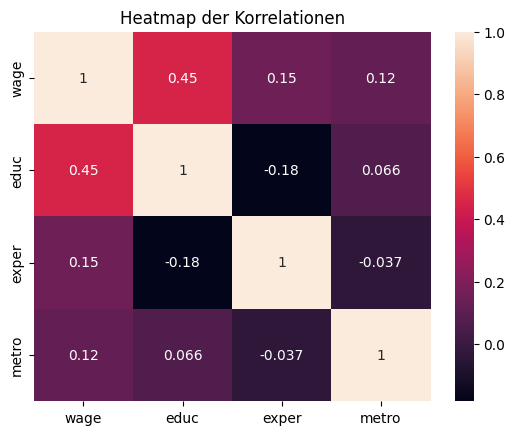

In [16]:
sns.heatmap(data = df.corr(method = "pearson", numeric_only=True), 
            annot=True) 
plt.title("Heatmap der Korrelationen")
plt.savefig("MLR_Output/Title_.png")
plt.show()

## Boxplot
---
Der Code bleibt größtenteils gleich:

- `sns.barplot()` initialisiert ein Balkendiagramm
    - `data = df` Die Visualisierung werden die Datena aus der Variable df entommen 
    - `x = "wage"` nimmt die Daten aus dem DataFrame und wählt die Spalte "wage" aus
    - `hue = "metro"` gruppierung der Daten in unseren Fall nach Metro
    - `gap = 0.5` erstellt eine Lücke zwischen beide Boxplots
- `plt.title("Boxplot von Erfahrung und Lohn")`
- `plt.grid(True)` fügt Gitterlinien hinzu
- `plt.savefig("MLR_Output/Title_")` speicher die Visualisierung in den Ordner Vis mit dem Titel: Title_

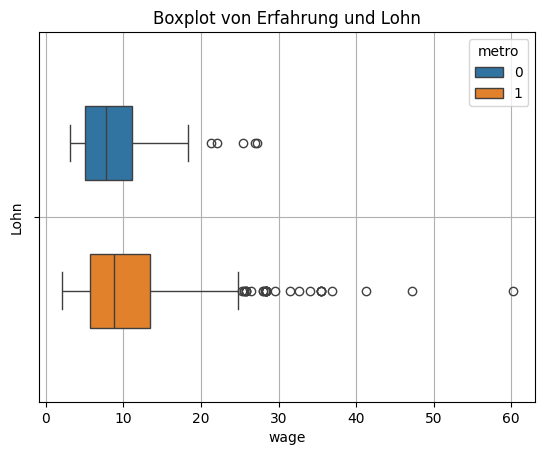

In [17]:
sns.boxplot(data = df, x = "wage", hue = "metro", gap = 0.5)
plt.title("Boxplot von Erfahrung und Lohn")
plt.ylabel("Lohn")
plt.grid(True)
plt.savefig("MLR_Output/Title_") 
plt.show()

## Scatterplot
---

Um ein Scatterplot zu erstellen, wird folgende Funktion verwendet
- `sns.scatterplot()` initiiert ein Scatterplot mit folgenden Parameter:
    - `data = df`                         # der Scatterplot verwendet die Daten von dein Variable `df`
    - `x = "exper"`                       # Die X-Achse nutz die Daten auf dem Dataframe `exper`
    - `y = "wage"`                        # Die Y-Achse nutz die Daten auf dem Dataframe `wage`
    - `alpha = 0.5` # fügt eine Transparenz hinzu die uns hilft konzentrierte Stellen zu erkennen.

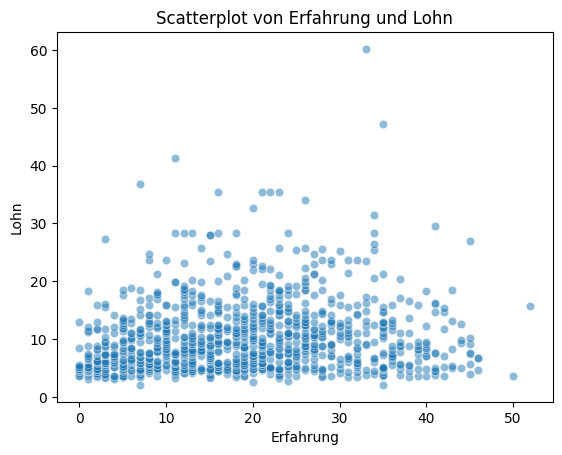

In [18]:
sns.scatterplot(data=df, x="exper", y="wage", alpha = 0.5) # alpha fügt transparenz hinzu
plt.xlabel("Erfahrung")
plt.ylabel("Lohn")
plt.title("Scatterplot von Erfahrung und Lohn")
plt.savefig("MLR_Output/Title_") 
plt.show()

## Balkendiagramm
---

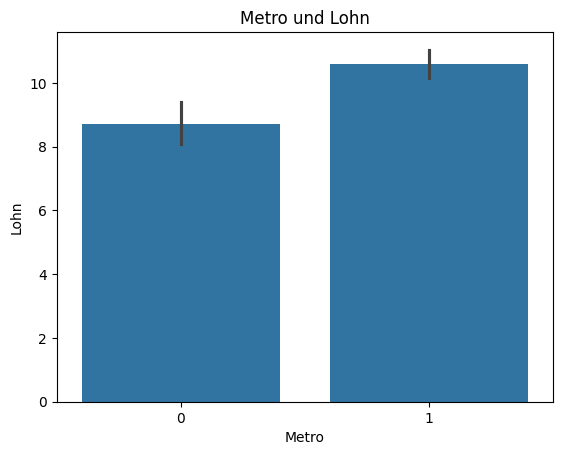

In [19]:
sns.barplot(data=df, x="metro", y="wage")
plt.xlabel("Metro")
plt.ylabel("Lohn")
plt.title("Metro und Lohn")
plt.savefig("MLR_Output/Title_")
plt.show()

## Histogramm
---

Erklärung des Codes:

1. Wir erstellen den Graphen durch `sns.histplot()`
    
    Parameter: 
    - `data = df["wage"]` wir geben den Parameter die Spalte `"wage"` mit um den Histogramm mit Daten zufüllen
    - `bins=30`  erwartet ein integer in wie viele Gruppen `"wage"` unterteilt werden sollen
    
2. Durch Matplotlib fügen wir die Achsenbeschriftung hinzu.
    - `plt.xlabel("Lohn")` gibt der X-Achse die beschriftung "Lohn"
    - `plt.ylabel("Anzahl")` gibt der Y-Achse die beschriftung "Anzahl"
    - `plt.title("Histogramm des Lohns")` gibt den Graphen den Titel "Histogramm des Lohns"
    - `plt.title("Histogramm des Lohns")
    - `plt.xticks(np.arange(0, 70, step=10))` verändert die Skalierung der X-Achse indem wir sagen `np.arange(0,70, step = 10)`. Das heißt der niedrigste Wert ist 0 der höchste 70 auf der X-Achse in 10 Schritte wiedergeben
    
    - `plt.yticks(np.arange(0, 260, step=50))` verändert die Skalierung der Y-Achse indem wir sagen `np.arange(0,260, step = 50)`. Das heißt der niedrigste Wert ist 0 der höchste Wert ist 260 auf der Y-Achse in 50 Schritte wiedergeben



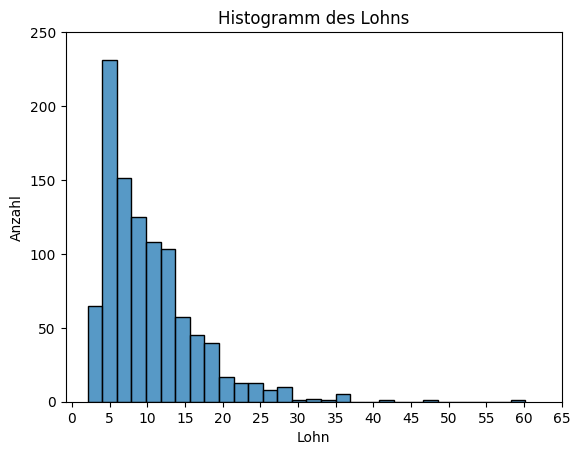

In [20]:
sns.histplot(data=df, x="wage", bins=30)
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
plt.xticks(np.arange(0, 70, step=5))
plt.yticks(np.arange(0, 260, step=50))
plt.savefig("MLR_Output/Title_")
plt.show()

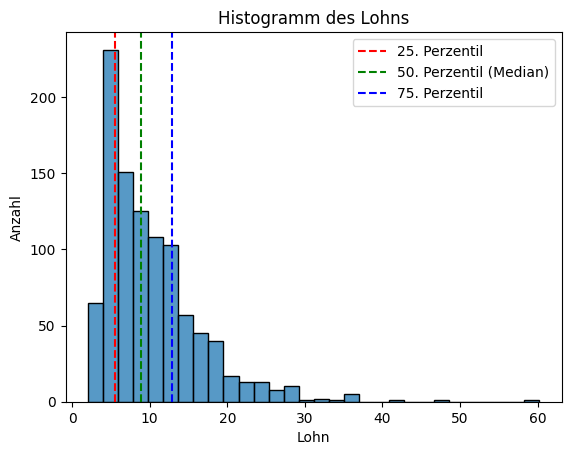

In [21]:
# Berechne die Perzentile (25., 50., 75.)
q25_wage = np.percentile(df['wage'], 25)
q50_wage = np.percentile(df['wage'], 50)  # Median
q75_wage = np.percentile(df['wage'], 75)

# Plot der Verteilung
sns.histplot(df['wage'], bins=30)

# Füge die vertikalen Linien für die Perzentile hinzu
plt.axvline(x=q25_wage, color='red', linestyle='--', label='25. Perzentil')
plt.axvline(x=q50_wage, color='green', linestyle='--', label='50. Perzentil (Median)')
plt.axvline(x=q75_wage, color='blue', linestyle='--', label='75. Perzentil')

# Plot-Details
plt.legend()
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
plt.savefig("MLR_Output/Title_") 
plt.show()

### Pairplot
---
Erstellt ein Visualisierung zwischen den Beziehungen der Daten

`sns.pairplot(df)`
- `hue = "metro"` gruppiert die Daten nach Metro

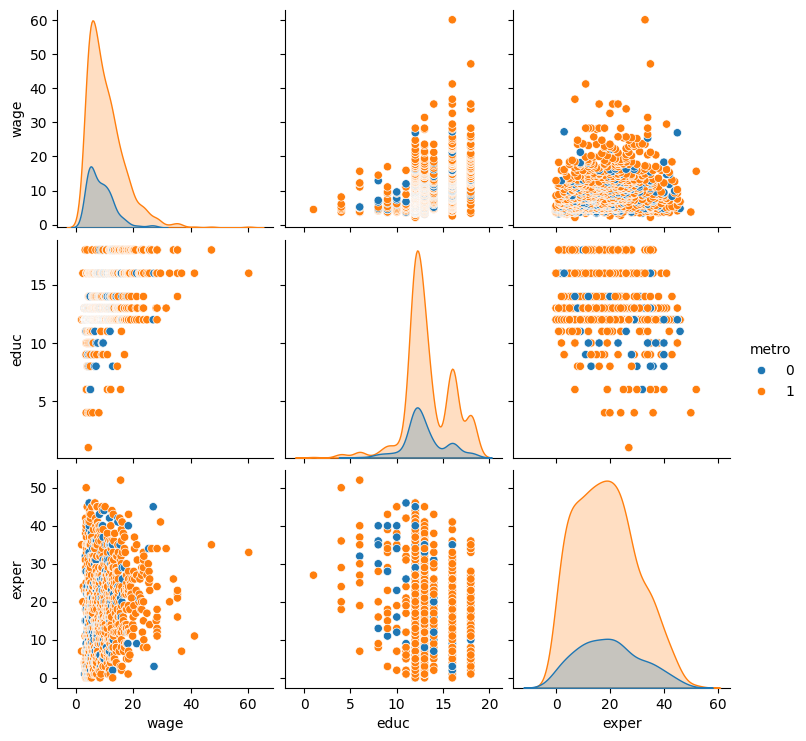

In [22]:
sns.pairplot(df, hue = "metro")
plt.savefig("MLR_Output/Title_") 
plt.show()